# Oh, Lord, won't you buy me a Mercedes-Benz?
## Diving into German Ebay car adds

![banner](https://imagescdn.dealercarsearch.com/DealerImages/4397/saved/b66ddcb7.jpg)

## Abstract

In this project, we analyze the german ebay dataset for used cars. We aim to extract general information about the cars advertised, and came up with the main observations:

* (1) What are the most popular combinations of models, brands, and vehicle types?
     - brands: Volkswagen(23%), bmw(15%), Mercedes(12%), Audi(11%), Opel(10%);
     
     - models: golf(8%), 3er(7%), a4, 5er and c_klasse (3%);
     
     - vehicle types: sedans(30%), stationwagons(20%), and small cars(17%).
     
* (2) Best cars to re-sell more generally:
    - More generally: older(8-12 years), high mileage, fairly abundant(>=0.16%), cheap(<€10k)
    
* (3) Worst cars to re-sell in general:
    
    - Generally: newer(4 years), not high mileage, fairly abundant(>=0.25%), expensive (€7.5k-€20k);

## Table of Contents

- [1. Introduction](#section1)
- [2. Goals and limitations](#section2)
- [3. Methodology](#section3)
- [4. Metadata](#section4)
- [5. Data Exploration](#section5)   
- [6. Data Cleaning and transformation](#section6)    
- [7. Data Visualization and Analysis](#section7)
- [8. Conclusion](#section8)

## 1. Introduction<a name="section1"></a>

A global phenomena in the last century has been undoubtedly the proliferation of cars in our daily lives. From before its creation in the late 19th century to today's electrified models, it has always been object of amusement and passion for many.

German cars have been a global benchmark in the automobile industry for over a century, accounting for top of mind brands such as Mercedes_Benz, Porsche, Audi, BMW, and now the most popular brand in the world, Volkswagen. But what do germans really prize when looking for a car? 

In this project, we look into the german ebay dataset for car advertisements to investigate what traits and patterns stand out when searching for a car when money is not the primary issue (as they are all used, low-priced). 

## 2. Goals and limitations<a name="section2"></a>
These are the questions we will address in this project:

* (1) What are the most popular combinations of models, brands, and vehicle types?
* (2) How do car models compare in general?
* (3) How do car brands compare in general?
* (4) How does car damage status compare in general?
* (5) How do fuel types compare in general?
* (6) How do automatic cars compare to manual ones in general?
* (7) How do vehicle types compare in general?


Our current limitations are as follows:

1. Any translation API would limit their max char intake, making it impossible to vectorize or loop through columns to translate;


## 3. Methodology<a name="section3"></a>

We start with overall statistics on sample units for a quick understanding, followed by groupings which will enable a bigger picture. To draw inferences from the data, we will deploy pandas pivot tables and multi-dimensional charts to enable generalisations about car segments, rather it be by car type, brand, fuel type, transmission type, damage status.

We will proceed to analyze the data with regular expressions, pandas and numpy libraries, trying to spot patterns, common qualifiers and outliers with visualization tools (mostly heatmaps and relational plots from seaborn).

## 4. Metadata<a name="section4"></a>

This data contains 370.000 car ads from the german ebay site.
The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included:

* dateCrawled : when this ad was first crawled, all field-values are taken from this date
* name : "name" of the car
* seller : private or dealer
* offerType: The type of listing
* price : the price on the ad to sell the car
* abtest: Whether the listing is included in an A/B test.
* vehicleType: The vehicle Type.
* yearOfRegistration : at which year the car was first registered
* gearbox: The transmission type.
* powerPS : power of the car in PS
* model: The car model name.
* kilometer : how many kilometers the car has driven
* monthOfRegistration : at which month the car was first registered
* fuelType: What type of fuel the car uses.
* brand: The brand of the car
* notRepairedDamage : if the car has a damage which is not repaired yet
* dateCreated : the date for which the ad at ebay was created
* nrOfPictures : number of pictures in the ad
* postalCode: The postal code for the location of the vehicle
* lastSeenOnline : when the crawler saw this ad last online

The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold. Regression on average Price per Year based on this dataset Happy Coding!

## 5. Data Exploration<a name="section5"></a>
* (1): Check for data type;
* (2): missing/repeated data
* (3): most common qualifiers;
* (4): unwanted columns and reasonableness

In [1]:
#(1): Check for data type;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import reader
from scipy import stats

plt.style.use('dark_background')
sns.set(style='dark')#darkgrid, white grid, dark, white and ticks

ebay = pd.read_csv('autos_original.csv', encoding='Windows-1252')
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

We should expect dateCreated, lastSeen, dateCrawled to be datetime objects. 

In [2]:
ebay.sample(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
208409,2016-03-30 18:58:17,Honda_Civic_1.4i,privat,Angebot,900,test,limousine,2000,NaN,0,civic,150000,10,benzin,honda,nein,2016-03-30 00:00:00,0,21031,2016-03-30 18:58:17
14969,2016-03-21 23:49:02,Audi_A3_2.0_TDI_Sportback_DPF_quattro_Ambiente,privat,Angebot,14000,test,kombi,2008,manuell,170,a3,125000,8,diesel,audi,nein,2016-03-21 00:00:00,0,91555,2016-04-05 13:45:50
274791,2016-03-22 22:36:45,Ford_Ka_zu_verkaufen,privat,Angebot,600,control,kleinwagen,1999,manuell,45,ka,125000,12,benzin,ford,NaN,2016-03-22 00:00:00,0,4435,2016-04-07 03:44:24
104031,2016-03-28 13:59:00,Dodge_RAM___2500__Crew_Cab_Laramie_6_7l_Cummin...,privat,Angebot,50500,test,suv,2012,automatik,355,NaN,60000,1,diesel,sonstige_autos,nein,2016-03-28 00:00:00,0,72649,2016-04-06 17:46:02
180955,2016-03-10 18:48:04,BMW_330i_Aut.,privat,Angebot,15900,test,limousine,2006,automatik,258,3er,80000,5,benzin,bmw,nein,2016-03-10 00:00:00,0,46244,2016-04-05 23:46:17
159293,2016-03-21 18:57:29,MINI_Mini_One_pepper,privat,Angebot,8000,test,kleinwagen,2008,manuell,95,one,80000,5,benzin,mini,nein,2016-03-21 00:00:00,0,20148,2016-04-06 21:47:21
37634,2016-03-26 16:46:47,Osterei___Ford_Ka_Futura_Sonderedition,privat,Angebot,800,control,kleinwagen,1998,manuell,60,ka,150000,12,benzin,ford,nein,2016-03-26 00:00:00,0,15754,2016-03-31 12:45:39
143491,2016-03-20 10:54:05,Mercedes_Benz_C_220_T_CDI_Sport,privat,Angebot,1600,control,kombi,1998,manuell,125,c_klasse,150000,8,diesel,mercedes_benz,nein,2016-03-20 00:00:00,0,86946,2016-03-20 10:54:05
21866,2016-03-27 14:51:00,Skoda_Oktavia_Ambiente_1_6_Limousine,privat,Angebot,7050,control,limousine,2009,manuell,0,octavia,125000,11,benzin,skoda,NaN,2016-03-27 00:00:00,0,13591,2016-04-01 14:45:29
97709,2016-03-11 21:54:39,Mercedes_A140_Bj.2003__Ideales_Anfaengerauto,privat,Angebot,2600,test,NaN,2017,manuell,0,a_klasse,150000,7,benzin,mercedes_benz,nein,2016-03-11 00:00:00,0,79618,2016-04-06 08:44:38


In [3]:
ebay.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


* You wouldn't expect the minimum price to be 0; median is still pretty low, but 3rd quartile is somewhat expected at (e) 7200. 
* There is also something wrong with the yearOfRegistration, where the minimum is 1000, and the maximum 9999.
* How can a car have 0 horsepower?
* the kilometer data seems to be segmented in spans rather than being the real odometer reading.
* some wrongly filled data in monthOfRegistration, for there is no month '0'.
* unfortunately, nrOfPictures seems to be filled with 0's only
* something wrong with postal codes as well, they all should have the same magnitude.

Text(0.5, 20.049999999999997, 'Columns')

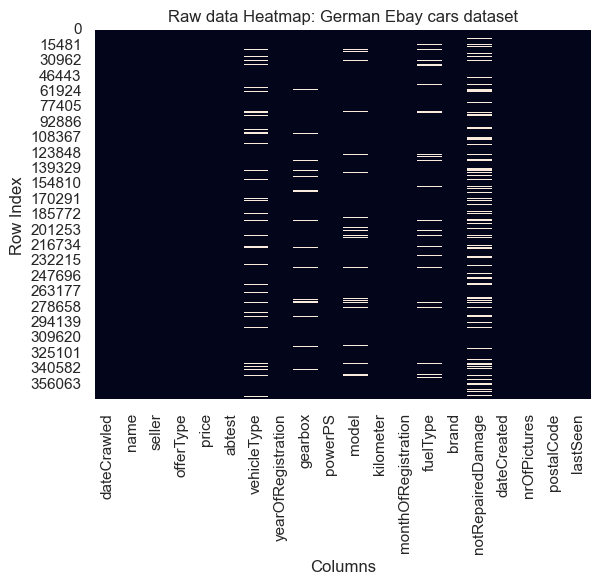

In [4]:
#(2) missing/repeated data
sns.heatmap(ebay.isnull(), cbar=False)
plt.title('Raw data Heatmap: German Ebay cars dataset')
plt.ylabel('Row Index')
plt.xlabel('Columns')


'vehicleType', 'gearbox', 'model', 'fuelType' and 'notRepairedDamage' have missing data, up to 20%.
'notRepairedDamage' seems much more depleted than its 299.000 entries in this heatmap.

In [5]:
#(2) duplicated rows 
ebay_no_date = ebay.drop(['dateCrawled','lastSeen', 'dateCreated' ], axis=1)
duplicates_ebay = ebay_no_date.duplicated()
ebay_no_date[duplicates_ebay]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
8995,Passat_Variant_2.0_TDI_BlueMotion_Technology_H...,privat,Angebot,10000,test,kombi,2013,manuell,140,passat,40000,6,diesel,volkswagen,nein,0,10115
9241,MONDEO_2_0TDCI_Leder_Beige_NAVI_Panorama,privat,Angebot,1700,test,limousine,2004,manuell,0,mondeo,150000,9,diesel,ford,NaN,0,53520
9498,A6_2.0_TDI_DPF_Garantie_Start_Stop_Navi,privat,Angebot,13000,test,limousine,2011,manuell,177,a6,80000,9,diesel,audi,nein,0,10115
10474,A4_Diesel_Leder_Top___NAVI,privat,Angebot,2400,test,limousine,2003,manuell,0,a4,150000,9,diesel,audi,NaN,0,40210
11302,A3_2.0_TDI_S_line_Sportpaket_Panorama_Navi,privat,Angebot,16000,test,limousine,2014,automatik,150,a3,20000,3,diesel,audi,nein,0,10115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371417,Mercedes_Benz_CLK_200_Tuev_02/2017_Coupe_Xenon...,privat,Angebot,1800,control,coupe,2000,manuell,0,clk,150000,10,benzin,mercedes_benz,nein,0,45661
371428,Audi_A_4_Automatik_Kombi_Mod_2007_Tuev_Au_neu_...,privat,Angebot,7399,test,kombi,2006,automatik,96,a4,125000,12,benzin,audi,nein,0,45699
371455,Volkswagen_Golf_VI_1.4__Klima_AHK__8_fach_bereift,privat,Angebot,8940,control,limousine,2009,manuell,80,golf,60000,8,benzin,volkswagen,nein,0,27299
371463,Opel_Corsa_B_Edition_100___54_PS___4_5_5_L._/_...,privat,Angebot,600,test,kleinwagen,1999,manuell,54,corsa,125000,12,benzin,opel,nein,0,35683


There seems to be only 4 repeated rows for the whole dataset, but when dropping the dates of the crawler, it turns out there are 4380 repeated entries. This might be due to ads retrieved more than once in different scrappers.

In [6]:
ebay.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
#(3) Most common qualifiers
for col in ebay.columns[1:-4]:
    if ebay[col].dtype=='object':
        print(col+':')
        print(ebay[col].value_counts())
        print('----')

name:
Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: name, Length: 233531, dtype: int64
----
seller:
privat        371525
gewerblich         3
Name: seller, dtype: int64
----
offerType:
Angebot    371516
Gesuch         12
Name: offerType, dtype: int64
----
abtest:
test       192585
control    178943
Name: abtest, dtype: int64
----
vehicleType:
limousine     95894
klei

* no surprise, 5 of top 7 brands are german, and the 4 of top 5 most sold models are also german.
* Interestingly, some columns are basically uniform: 'seller'(only 3 adds from stores), 'offerType': only 12 ads searching for cars;
* Some models' values are ambiguous, eg 'andere'('other'), '3_reihe'(3 series): investigate models;
* 'andere' also shows as a fuel type;
* CNG = natural gas, LPG = autogas;
* limousine means 'sedan' in german, and are the most popular vehicleType, followed by station wagons and small cars 
* around 36k (9.5%) ads have damages not repaired before sale.

In [8]:
#(3) most common qualifiers: 'seller'
#gewerblich = commercial, store
ebay[ebay['seller']=='gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
59155,2016-03-15 18:06:22,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,gewerblich,Angebot,100,control,kombi,2000,manuell,0,megane,150000,8,benzin,renault,NaN,2016-03-15 00:00:00,0,65232,2016-04-06 17:15:37
149393,2016-03-22 09:54:43,Chevrolet_Matiz_1.Hd_TÜV11/2017,gewerblich,Angebot,1100,test,kleinwagen,2006,manuell,38,matiz,150000,10,benzin,chevrolet,nein,2016-03-22 00:00:00,0,7973,2016-04-05 21:15:48
186181,2016-03-14 15:58:22,BMW_2000_AUTOMATIK_H_ZULASSUNG,gewerblich,Angebot,6900,control,limousine,1967,automatik,101,andere,70000,8,benzin,bmw,nein,2016-03-14 00:00:00,0,73614,2016-04-05 19:45:06


The first is an ad for selling car parts

In [9]:
#(3) most common qualifiers: 'offerType'
#Gesuch = wanted: people looking for vehicles instead of selling
ebay[ebay['offerType']=='Gesuch']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
16744,2016-04-03 15:48:33,Suche_VW_T5_Multivan,privat,Gesuch,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-04-03 00:00:00,0,29690,2016-04-05 15:16:06
90921,2016-03-27 14:55:45,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,privat,Gesuch,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27 00:00:00,0,50181,2016-04-07 11:45:18
144154,2016-03-14 18:51:39,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,privat,Gesuch,0,test,coupe,2004,manuell,0,3er,150000,1,benzin,bmw,nein,2016-03-14 00:00:00,0,86956,2016-03-25 06:17:06
150400,2016-03-07 21:37:03,Suche_Mercedes_300D__W124__Silberdistel_metall...,privat,Gesuch,0,control,NaN,1985,NaN,109,e_klasse,150000,0,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,68169,2016-03-07 21:37:03
164788,2016-03-28 15:56:38,Suche_bitte_hilfe,privat,Gesuch,0,control,NaN,2016,manuell,0,astra,20000,2,diesel,opel,nein,2016-03-28 00:00:00,0,26215,2016-03-28 15:56:38
183716,2016-03-11 10:57:56,Clio_3_Bremsen_vorne_und_hinten_wechseln__EILT!!,privat,Gesuch,0,test,kleinwagen,2005,manuell,0,clio,150000,12,benzin,renault,nein,2016-03-11 00:00:00,0,79423,2016-03-11 23:46:30
251359,2016-03-21 07:55:59,SZUKAM_taniego_TRANSPORTU_auta_do_Polski,privat,Gesuch,150,control,NaN,2000,NaN,0,NaN,5000,1,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,0,50129,2016-03-22 11:45:33
285243,2016-03-15 18:55:15,Trabant_gesucht!!!!,privat,Gesuch,2000,control,NaN,1980,NaN,0,andere,50000,0,NaN,trabant,NaN,2016-03-15 00:00:00,0,1609,2016-03-20 16:16:04
315232,2016-03-28 19:55:44,Ford_Fiesta_2005_mit_Unfallschaden,privat,Gesuch,1550,control,kleinwagen,2005,manuell,90,fiesta,150000,3,diesel,ford,ja,2016-03-28 00:00:00,0,30827,2016-03-28 19:55:44
327204,2016-03-13 07:52:29,Kaufe_Bastlerfahrzeuge_aller_art.,privat,Gesuch,555,test,NaN,2000,manuell,55,NaN,150000,3,NaN,sonstige_autos,ja,2016-03-13 00:00:00,0,34308,2016-03-25 12:48:34


The second to last there is a car collector 

In [10]:
ebay[ebay['brand'].str.contains('rover')]['brand'].value_counts()

land_rover    770
rover         490
Name: brand, dtype: int64

In [11]:
ebay[ebay['model']=='andere'].sample(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
182008,2016-04-01 11:37:55,BMW_218i_Active_Tourer_Advantage,privat,Angebot,23900,test,bus,2015,manuell,136,andere,10000,5,benzin,bmw,nein,2016-04-01 00:00:00,0,85757,2016-04-07 07:45:56
137284,2016-03-21 19:43:37,Peugeot_Partner_1.6_HDi_90_L2_Kasten,privat,Angebot,3550,test,bus,2011,manuell,90,andere,80000,8,diesel,peugeot,ja,2016-03-21 00:00:00,0,72827,2016-04-06 21:47:24
161633,2016-04-03 23:37:15,Porsche_928,privat,Angebot,11928,control,coupe,1980,automatik,241,andere,150000,6,benzin,porsche,nein,2016-04-03 00:00:00,0,42349,2016-04-06 08:16:30
285849,2016-03-21 12:55:56,Chevrolet_Kalos_1.2,privat,Angebot,2550,control,kleinwagen,2005,manuell,72,andere,80000,7,lpg,chevrolet,nein,2016-03-21 00:00:00,0,27809,2016-03-28 07:44:50
341120,2016-03-07 09:44:02,Toyota_Land_Cruiser_200,privat,Angebot,26000,control,suv,2009,automatik,0,andere,150000,8,diesel,toyota,nein,2016-03-07 00:00:00,0,6862,2016-03-07 09:44:02
153784,2016-03-13 19:43:10,Volvo_S80_2.9,privat,Angebot,5100,control,limousine,2004,automatik,196,andere,150000,9,benzin,volvo,nein,2016-03-13 00:00:00,0,58453,2016-03-25 15:15:24
353355,2016-03-12 13:59:08,Verkaufe_pkw_ford_puma,privat,Angebot,1000,control,kleinwagen,1999,manuell,90,andere,80000,2,benzin,ford,nein,2016-03-12 00:00:00,0,8280,2016-04-06 21:46:00
61948,2016-03-14 14:38:16,Fiat_179_Ulysse,privat,Angebot,3900,control,bus,2004,NaN,0,andere,150000,10,NaN,fiat,nein,2016-03-14 00:00:00,0,51377,2016-03-18 01:17:39
360907,2016-03-09 22:51:35,Citroen_Jumpy__Zylinderkopfdichtung_defekt__su...,privat,Angebot,400,test,kombi,1999,manuell,69,andere,150000,11,diesel,citroen,ja,2016-03-09 00:00:00,0,44227,2016-04-03 01:20:08
163271,2016-03-14 17:47:08,Mercedes_Benz_A_200_CDI_AMG,privat,Angebot,24000,test,limousine,2013,manuell,140,andere,80000,3,diesel,mercedes_benz,nein,2016-03-14 00:00:00,0,94545,2016-03-22 12:17:39


Many of the 'andere' car models actually contain that information on the name

In [12]:
#(3) most common qualifiers:unknown models'
unknowns=['3er', 'andere', '3_reihe', '80', '159', '850', '200', '9000', 'note', 'r19']
no_date_ebay=ebay.drop(['dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis=1)
no_date_ebay[no_date_ebay['model'].isin(unknowns)].head(3)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
7,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
10,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein


It seems that r'[0-9]er' and r'[A-Z][0-9]_reihe' are analogous to 'series'. In the first example it applies only to BMW (1 series, 3 series, etc), but in the second one there are many different brands (ex: Peugeot 307 as a 3_reihe, Mazda, etc)

A considerable stack of our data (10%) has no real input for its horsepower, on top of missing values. 

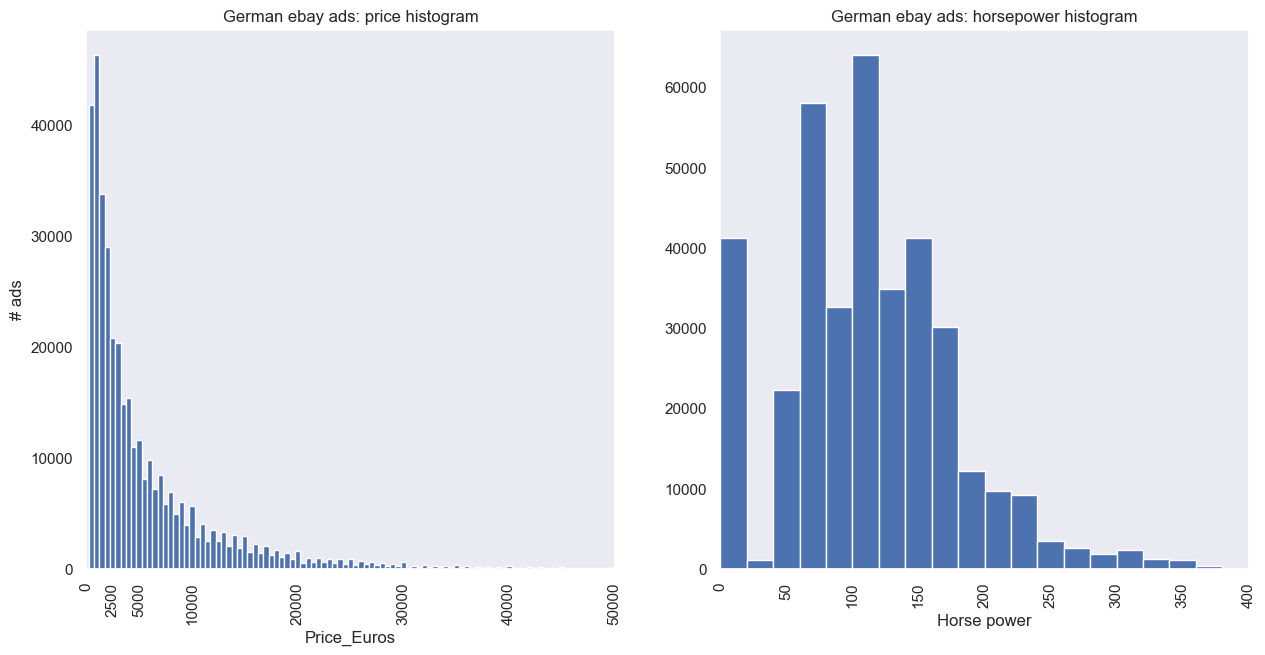

In [13]:
#(3) most common qualifiers: powerPS
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
data = ebay[ebay['price']<3200000]['price']
data.plot.hist(bins = 100, range = (0,50001), align = 'right')#plt.hist(data, np.arange(0, 320000, 500))
plt.title('German ebay ads: price histogram')
plt.xlabel('Price_Euros')
plt.ylabel('# ads')
plt.xlim([0,50000])
plt.xticks([0,2500, 5000, 10000, 20000, 30000, 40000, 50000], rotation=90)
plt.subplot(1,2,2)
plt.hist(ebay[ebay['powerPS']<1000]['powerPS'], np.arange(0, 400, 20))
plt.title('German ebay ads: horsepower histogram')
plt.xlabel('Horse power')
plt.xlim([0,400])
plt.xticks([0,50,100,150,200,250,300,350,400], rotation=90)
plt.show()

There is a lot of ads with extremely low prices, e.g. 0, and there is no clearcut threshold as to where the real prices start. The ad amounts are plotted for every $ 500 interval. 

There is lots of entries for powerPS that are just null, aside from the missing values.

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ebay[ebay['price']>745000])

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
14663,2016-04-03 06:03:56,Tausch_moeglich_Polo_vw_n9,privat,Angebot,11111111,control,coupe,2003,manuell,64,polo,150000,2,benzin,volkswagen,NaN,2016-04-03 00:00:00,0,46535,2016-04-07 10:16:51
16889,2016-03-15 16:45:45,Ford_Mondeo_Kombi_TÜV_abgelaufen,privat,Angebot,1000000,control,kombi,1998,NaN,0,mondeo,150000,0,benzin,ford,ja,2016-03-15 00:00:00,0,26607,2016-03-15 16:45:45
20143,2016-03-18 00:55:53,Porsche_911R_Einer_von_911,privat,Angebot,1250000,test,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein,2016-03-17 00:00:00,0,70435,2016-03-20 04:48:27
20746,2016-03-08 15:54:52,Golf3_Schlachtfest,privat,Angebot,12345678,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-08 00:00:00,0,18516,2016-03-17 16:15:43
21467,2016-03-19 19:45:02,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,privat,Angebot,9999999,control,coupe,1967,manuell,215,911,50000,10,benzin,porsche,nein,2016-03-19 00:00:00,0,70435,2016-04-01 10:45:30
38445,2016-03-21 19:53:52,2_VW_Busse_T3,privat,Angebot,999999,test,bus,1981,manuell,70,transporter,150000,1,benzin,volkswagen,NaN,2016-03-21 00:00:00,0,99880,2016-03-28 17:18:28
39625,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,0,14542,2016-04-06 23:17:31
41980,2016-03-11 09:37:17,Maserati_MC12,privat,Angebot,2995000,control,coupe,2005,NaN,630,NaN,5000,7,benzin,sonstige_autos,nein,2016-03-11 00:00:00,0,74232,2016-04-06 21:47:44
45055,2016-04-02 00:06:21,Ferrari_LaFerrari_Deutsche_Auslieferung._A_Cel...,privat,Angebot,2795000,control,coupe,2016,NaN,963,NaN,5000,3,NaN,sonstige_autos,nein,2016-04-01 00:00:00,0,60435,2016-04-03 14:32:00
45833,2016-03-15 10:53:11,Porsche_911_Turbo__930_,privat,Angebot,1000000,control,coupe,1981,manuell,300,911,150000,1,benzin,porsche,nein,2016-03-15 00:00:00,0,10969,2016-03-22 09:18:05


There is also lots of cars with absurdly high prices for no apparent reason other than 'trying to hack the search engine': Polos, Mondeos, GM pick ups, and so on.

In [15]:
models=list(ebay['model'].unique())
models

['golf',
 nan,
 'grand',
 'fabia',
 '3er',
 '2_reihe',
 'andere',
 'c_max',
 '3_reihe',
 'passat',
 'navara',
 'ka',
 'polo',
 'twingo',
 'a_klasse',
 'scirocco',
 '5er',
 'meriva',
 'arosa',
 'c4',
 'civic',
 'transporter',
 'punto',
 'e_klasse',
 'clio',
 'kadett',
 'kangoo',
 'corsa',
 'one',
 'fortwo',
 '1er',
 'b_klasse',
 'signum',
 'astra',
 'a8',
 'jetta',
 'fiesta',
 'c_klasse',
 'micra',
 'vito',
 'sprinter',
 '156',
 'escort',
 'forester',
 'xc_reihe',
 'scenic',
 'a4',
 'a1',
 'insignia',
 'combo',
 'focus',
 'tt',
 'a6',
 'jazz',
 'omega',
 'slk',
 '7er',
 '80',
 '147',
 'glk',
 '100',
 'z_reihe',
 'sportage',
 'sorento',
 'v40',
 'ibiza',
 'mustang',
 'eos',
 'touran',
 'getz',
 'a3',
 'almera',
 'megane',
 'lupo',
 'r19',
 'zafira',
 'caddy',
 'mondeo',
 'cordoba',
 'colt',
 'impreza',
 'vectra',
 'berlingo',
 'm_klasse',
 'tiguan',
 'i_reihe',
 'espace',
 'sharan',
 '6_reihe',
 'panda',
 'up',
 'seicento',
 'ceed',
 '5_reihe',
 'yeti',
 'octavia',
 'mii',
 'rx_reihe',
 

In [16]:
#(4) unwanted rows/columns, reasonableness:
three_ascii_mask = ebay['name'].str.count(r'[^\x00-\x7F]').gt(3)
ebay[three_ascii_mask].head(50)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3221,2016-03-12 16:48:16,BMW_118i_–_Bj_12/2012_–_36.500_KM_–_Super_Zust...,privat,Angebot,16800,control,limousine,2012,manuell,170,1er,40000,12,benzin,bmw,nein,2016-03-12 00:00:00,0,81543,2016-03-29 00:15:51
6483,2016-03-31 08:53:18,PICK_UP_Gonow_Troy_»_1_9l_Turbo_Diesel_»_Allra...,privat,Angebot,6800,control,andere,2008,manuell,0,NaN,70000,0,diesel,sonstige_autos,nein,2016-03-31 00:00:00,0,14712,2016-04-06 03:15:44
10800,2016-03-19 10:58:15,€€€_Mercedes_Benz_E200_Kompressor___Garage___S...,privat,Angebot,6500,test,limousine,2004,automatik,163,e_klasse,150000,9,benzin,mercedes_benz,nein,2016-03-19 00:00:00,0,28215,2016-03-20 12:44:26
25906,2016-03-08 15:46:36,350€€€€_VARIO,privat,Angebot,350,test,kombi,1997,manuell,75,cordoba,150000,0,benzin,seat,NaN,2016-03-08 00:00:00,0,80634,2016-03-11 09:45:06
46106,2016-03-13 01:56:59,€€€_Mercedes_E200_Kompressor___Garagenwagen___...,privat,Angebot,6500,control,limousine,2004,automatik,163,e_klasse,150000,9,benzin,mercedes_benz,nein,2016-03-13 00:00:00,0,28215,2016-03-13 08:39:13
54271,2016-04-02 10:49:50,Smart_fortwo_Passion_–_PSD_–_Licht/Regen_–_Ser...,privat,Angebot,8650,test,coupe,2013,automatik,71,fortwo,30000,4,benzin,smart,NaN,2016-04-02 00:00:00,0,41542,2016-04-06 08:45:06
63567,2016-03-25 21:55:25,VW_T4_2.4_California_–_TÜV_–2_Hand–Reisebereit...,privat,Angebot,8999,test,bus,1995,manuell,77,transporter,150000,7,diesel,volkswagen,nein,2016-03-25 00:00:00,0,25436,2016-04-01 11:16:35
83138,2016-03-26 09:53:53,Peugeot_206_QUIKSILVER_•109Ps•Klima•Airbag•Tag...,privat,Angebot,2190,control,kleinwagen,2004,manuell,109,2_reihe,125000,10,benzin,peugeot,NaN,2016-03-26 00:00:00,0,97070,2016-04-05 21:47:49
86946,2016-03-13 04:36:16,Porsche_Cayenne__V8_Sound_++Mieten•••••,privat,Angebot,0,test,NaN,2005,NaN,0,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-13 00:00:00,0,44532,2016-03-20 13:17:59
95342,2016-03-12 11:53:43,Verkaufe_Ford_KA_als_Teilespender_oder_zum_Wie...,privat,Angebot,120,test,kleinwagen,1997,manuell,60,ka,150000,5,benzin,ford,ja,2016-03-12 00:00:00,0,15344,2016-03-13 03:15:55


'dateCrawled', 'abtest', 'monthOfRegistration' are useless at the end of the day. We need 'date crawled' for calculating the 'ad_lifespan' and 'year_sale', but after that we can delete both 'dateCreated' and 'lastSeen'. There doesn't seem to be uninteligible adds.

Summary of data exploration:
* (1) datatype: 
    - We should expect dateCreated, lastSeen, dateCrawled to be datetime objects;
    - lots of data in German;
* (2) missing/repeated data: 
    - 'vehicleType', 'gearbox', 'model', 'fuelType' and 'notRepairedDamage' have missing data, up to 20%;
    - 4380 repeated rows
* (3) most common qualifiers:
    - 5 of top 7 brands are german, 4 of 5 top most sold models are also german;
    - Some of the data is 'Gesuch', or people in search of cars, not an actual car ad.
    - Some 'model' values are ambiguous, eg 'andere'('other'), '3_reihe'(300's);
    - There are lots of ads below 1000 euros, and some with ridiculously high price tags just to hack search engines .
    - There is also something wrong with the yearOfRegistration, where the minimum is 1000, and the maximum 9999
    - some postal_code values are also wrong, presenting different magnitudes
    - powerPS has many 0 values;
    - 'sonstige_autos' in 'brands' is for unique, outlier cars.
* (4) unwanted rows/columns:
    - 'dateCrawled', 'monthOfRegistration', 'abtest';
    - Other than that, data seems inteligible    
* (5) columns to be created:
    - ad_lifespan: lastSeen - dateCreated
    - year_sold: from last_seen

## 6. Data Cleaning and Transformation <a name="section6"></a>

Given the summary of ou data exploration above, we will adress those issues in order, as below:
* (1) datatype:
    - transform datatype;    
    - map data with dictionaries to translate from german;    
    - standardize column names w/ snake_case
    
* (2) duplicate/missing data:
    - 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'model': delete rows w/ missing values;
    - remove 1800 repeated rows
    
* (3) most common qualifiers:
    - some model values are wrong: '3er', 'andere', '3_reihe';
    - delete rows with powerPS == 0;
    - Exclude the 'Gesuch' ads;
    - Only consider car ads above 1500 euros, <[3.2M](https://www.hotcars.com/ebay-collector-cars-most-expensive/) .
    - Only consider yearOfRegistration between 1880 and 2017;
    - only consider postal codes with 5 figures;
    - exclude 'sonstige_autos' from 'brands'
    
* (4) unwanted rows/columns
    - remove 'dateCrawled', 'monthOfRegistration', 'abtest'

Additionaly, 
* (5) create new column: ad_lifespan, year_sold, age;


In [17]:
#(1) datatype:-transform datatype: dateCreated, lastSeen, dateCrawle, d to be datetime object;
#, 'name', 'seller', 'offertype', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage' into strings
ebay_up = ebay.copy()
ebay_up[['dateCreated', 'lastSeen', 'dateCrawled']] = ebay_up[['dateCreated', 'lastSeen', 'dateCrawled']].apply(pd.to_datetime)
#ebay[['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']] = ebay[['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']].astype('|S')
ebay_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [18]:
#(1) datatype: map data with dictionaries to translate from german: seller, offerType, vehicleType, gearbox,
cols_german = ['seller', 'offerType', 'vehicleType', 'gearbox','fuelType', 'notRepairedDamage']

for col in cols_german:
    print(f'{col}: {ebay_up[col].unique()}')

seller: ['privat' 'gewerblich']
offerType: ['Angebot' 'Gesuch']
vehicleType: [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
gearbox: ['manuell' 'automatik' nan]
fuelType: ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
notRepairedDamage: [nan 'ja' 'nein']


In [19]:
#(1) datatype: map data with dictionaries to translate from german: seller, offerType, vehicleType, gearbox, 
ebay_up2=ebay_up.copy()
deutsch_eng_dict={
    'privat':'private',
    'gewerblich':'commercial',
    'Angebot':'offer',
    'Gesuch':'request',
    'bus':'bus',
    'limousine':'sedan',
    'kleinwagen': 'small_car',
    'kombi': 'stationwagon',
    'coupe':'coupe',
    'suv':'suv',
    'andere': 'other',
    'cabrio': 'convertible',
    'manuell': 0,
    'automatik': 1,
    'lpg':2,
    'benzin': 1,
    'diesel':0,
    'cng':3,
    'hybrid':4,
    'elektro':5,
    'andere':0,
    'nein':0,
    'ja':1,
}

for col in cols_german:
    ebay_up2[col]=ebay_up2[col].map(deutsch_eng_dict)
  

In [20]:
#(1) - standardize column names w/ snake_case 
def camel_snake_converter(name):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()
ebay_up3=ebay_up2.copy()
ebay_up3.rename(camel_snake_converter, axis=1, inplace=True)
final_rename = {
    'power_p_s':'power_ps',
    'price': 'price_€',
    'not_repaired_damage': 'damaged',
    'gearbox': 'automatic_gearbox'
}
ebay_up3 = ebay_up3.rename(final_rename, axis=1)
len(ebay_up3)

371528

In [21]:
#(1) - standardize data
ebay_up4=ebay_up3.copy()
ebay_up4['brand'] = ebay_up4['brand'].str.replace('rover', 'land_rover', regex=True)
ebay_up4['brand'] = ebay_up4['brand'].str.replace('land_land_rover', 'land_rover', regex=True)

In [22]:
#(2) duplicate/missing data: dropping duplicate rows
ebay_up5 = ebay_up4[~duplicates_ebay]
len(ebay_up5)

367148

By dropping duplicates, we reduce our dataset in 4400 entries.

In [23]:
brand_list = list(ebay_up5['brand'].unique())
model_list= list(ebay_up5['model'].unique())
model_list.remove('andere')

In [24]:
(ebay_up5['model']=='andere').sum()+ebay_up5['model'].isnull().sum()+(ebay_up5['model']=='grand').sum()

47177

This is the total 'model' values that are obviously wrong at first, which we intend to clean in a future step. For now, let's create a dictionary with all existing models and brands, enabling a quick reference to all existing values.

In [25]:
cols = ['brand', 'model']
ebay_up5_short = ebay_up5.copy()[cols].drop_duplicates()

brand_dict = ebay_up5_short.groupby('brand')['model'].apply(list).to_dict()

for k, v in brand_dict.items():
    if np.nan in v:
        v.remove(np.nan)
    if 'andere' in v:
        v.remove('andere')
brand_dict['citroen'].append('c8')
brand_dict['mitsubishi'].append('space_wagon')
brand_dict['toyota'].append('land_cruiser')
#brand_dict

In [26]:
ebay_up6=ebay_up5.copy()
ebay_up6['name'] = ebay_up6['name'].str.lower()
ebay_up6['name'] = ebay_up6['name'].str.replace('_benz','', regex=True)
ebay_up6['name'] = ebay_up6['name'].str.replace('mercedes','mercedes_benz', regex=True)
ebay_up6['name'] = ebay_up6['name'].str.replace('vw','volkswagen', regex=True)
ebay_up6['name'] = ebay_up6['name'].str.replace('citroën','citroen', regex=True)
ebay_up6['name'] = ebay_up6['name'].str.replace('mb_','mercedes_benz_', regex=True)
ebay_up6['name'] = ebay_up6['name'].str.replace('peugeout','peugeot', regex=True)
ebay_up6['name'] = ebay_up6['name'].str.replace('forttwo','fortwo', regex=True)
ebay_up6['model'] = ebay_up6['model'].fillna('')
ebay_up6['replacement']=np.nan

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ebay_up6.head())

,date_crawled,name,seller,offer_type,price_€,abtest,vehicle_type,year_of_registration,automatic_gearbox,power_ps,model,kilometer,month_of_registration,fuel_type,brand,damaged,date_created,nr_of_pictures,postal_code,last_seen,replacement
0,2016-03-24 11:52:17,golf_3_1.6,private,offer,480,test,NaN,1993,0,0,golf,150000,0,1,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,NaN
1,2016-03-24 10:58:45,a5_sportback_2.7_tdi,private,offer,18300,test,coupe,2011,0,190,,125000,5,0,audi,1,2016-03-24,0,66954,2016-04-07 01:46:50,NaN
2,2016-03-14 12:52:21,"jeep_grand_cherokee_""overland""",private,offer,9800,test,suv,2004,1,163,grand,125000,8,0,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,NaN
3,2016-03-17 16:54:04,golf_4_1_4__3türer,private,offer,1500,test,small_car,2001,0,75,golf,150000,6,1,volkswagen,0,2016-03-17,0,91074,2016-03-17 17:40:17,NaN
4,2016-03-31 17:25:20,skoda_fabia_1.4_tdi_pd_classic,private,offer,3600,test,small_car,2008,0,69,fabia,90000,7,0,skoda,0,2016-03-31,0,60437,2016-04-06 10:17:21,NaN


In [28]:
(ebay_up6['model']=='andere').sum()

26197

In [29]:
(ebay_up6['model'].isnull()).sum()

0

In [30]:
(ebay_up6['model']=='').sum()

20374

For  'andere' alone, there are 26197 wrong 'model' entries.

In [31]:
'tdi' in brand_dict['audi']

False

In [32]:
brand_dict['lexus'] = []
brand_dict['iveco']=[]
brand_dict['cadillac'] = []
brand_dict['chevrolet'].append('corvette')
brand_dict['cadillac'].append('deville')

In [33]:
#(3) common qualifiers: model: 
# filling in model names with the aid of the brand-model dict, or the 'name' row itself

counter_cases={'0':0, '1.1':0, '1.2':0, '2.1':0, '2.2':0, '2.1.1':0, '2.1.2': 0, '2.2.1':0, '2.2.2':0, 'null':0, 'null_no_hope':0}

def model_from_name(row): 
            
    name_list = row['name'].split('_')
    if row['model']=='grand' :
    #model names that are currently only 'grand' for 3 major brands
        for k,v in {'suzuki':'vitara', 'jeep':'cherokee', 'chrysler':'town&country'}.items():#
            if (row['model']=='grand')&(row['brand']==k):#
#                 print(name_list)
#                 print('0')
                counter_cases['0']+=1
                row['replacement'] = row['model']+'_'+v#
                row['model']=row['replacement']  
#                 print(row['model'])
        
    elif (row['model']==np.nan)|(row['model']=='andere')|(row['model']==''):#1: missing values, 'andere', ''
#         print('it is either nan, "" or "andere"')
        new_name_list=[]
        for n in range(0, len(name_list)):
            if n != (len(name_list)-1):
                new_name_list.append(name_list[n]+'_'+name_list[n+1])
            else:
                 new_name_list.append(name_list[n])
        the_name = row['name']
        if list(set(brand_dict[row['brand']]).intersection(set(name_list))):
        #if any single-named model from the brand[row['brand']] dict is in the name_list
#             print(name_list)
#             print('1.1')            
            counter_cases['1.1']+=1
            match = list(set(brand_dict[row['brand']]).intersection(set(name_list)))
#             print(match)
            row['replacement']=match[0]
            row['model']=row['replacement']
#             print(row['model'])
            
        elif list(set(brand_dict[row['brand']]).intersection(set(new_name_list))):
        # if any double_named model from brand[row['brand']] dict is in name_list
#             print(new_name_list)
#             print('1.2')            
            counter_cases['1.2']+=1
            match = list(set(brand_dict[row['brand']]).intersection(set(new_name_list)))
#             print(match)
            row['replacement']=match[0]
            row['model']=row['replacement']
#             print(row['model'])
            
#         elif [i for i, e in enumerate(name_list) if e==row['brand']]:#(row['brand'] in name_list):
#         #single_named brand in name_list, no model from brand_dict in 'name' 
# #             print(name_list)
# #             print('2.1.1: brand in name_list')
#             counter_cases['2.1.1']+=1
#             all_intersect = [i for i, e in enumerate(name_list) if e==row['brand']]
# #             print(all_intersect)
#             last_index=all_intersect[-1]
#             if (len(name_list)>last_index+1): 
#             #if the brand name is not the last in the name_list
# #                 print('2.1.2: brand not last string')  
#                 counter_cases['2.1.2']+=1
#                 new = name_list[last_index+1]
# #                 print(new)
#                 if len(new)>1: 
#                 #if the next str is not the brand, 'andere' or single char        
# #                     print('2.1')            
#                     counter_cases['2.1']+=1
#                     brand_dict[row['brand']].append(new)
#                     model_list.append(new)
#                     row['replacement'] = new
#                     row['model']=row['replacement']
# #                     print(row['model'])
            
#         elif [i for i, e in enumerate(new_name_list) if e==row['brand']]: #(row['brand'] in new_name_list):
#         #double_named brand, no model from brand_dict in 'name'
# #             print('2.2.1: double_named brand in new_name_list')
# #             print(new_name_list)
#             counter_cases['2.2.1']+=1
#             all_intersect = [i for i, e in enumerate(new_name_list) if e==row['brand']]
# #             print(all_intersect)
#             last_index = all_intersect[-1]
#             if (len(new_name_list)> last_index+2):
#             #if brand name not the last in the new_name_list
# #                 print('2.2.2: brand not last string')
#                 counter_cases['2.2.2']+=1
#                 new = new_name_list[last_index+2]
# #                 print(new)
#                 #the assumed model is the one string after the brand name
#                 if len(new)>1:                
# #                     print('2.2')            
#                     counter_cases['2.2']+=1
#                     row['replacement'] = new
#                     row['model']=row['replacement']
# #                     print(row['model'])
        else:
            row['replacement'] = row['model']
#             print('no_case')
#             print(name_list)
#             print(row['brand'])
#             print(row['replacement'])
            counter_cases['null_no_hope']+=1
#         print('---')
    return row           
                     
ebay_model = ebay_up6.copy()
# ebay_model['model']= ebay_model['model'].str.replace('andere', np.nan)
# ebay_model['model']= ebay_model['model'].str.replace('', np.nan)
ebay_model = ebay_model.apply(model_from_name, axis=1)#

In [34]:
print(counter_cases)

{'0': 606, '1.1': 9733, '1.2': 324, '2.1': 0, '2.2': 0, '2.1.1': 0, '2.1.2': 0, '2.2.1': 0, '2.2.2': 0, 'null': 0, 'null_no_hope': 36514}


In [35]:
(ebay_model['model']=='andere').sum()+(ebay_model['model'].isnull()).sum()+(ebay_model['model']=='grand').sum()+(ebay_model['model']=='').sum()

36541

In [36]:
(ebay_model['model']=='andere').sum()

24560

In [37]:
(ebay_model['model'].isnull()).sum()

0

In [38]:
(ebay_model['model']=='').sum()

11954

In [39]:
null_mask = ebay_model['model'].isnull()
ebay_model2 = ebay_model[~null_mask]
andere_mask = ebay_model2['model']=='andere'
ebay_model3 = ebay_model2[~andere_mask]
grand_mask = ebay_model3['model']=='grand'
ebay_model4 = ebay_model3[~grand_mask]
print(len(ebay_model), len(ebay_model4))

367148 342561


In [40]:
ebay_veh = ebay_model4.copy()
ebay_veh['vehicle_type'] = ebay_veh['vehicle_type'].replace('andere', 'others')
ebay_veh['vehicle_type'] = ebay_veh['vehicle_type'].replace(np.nan, 'others')
ebay_veh['vehicle_type'] = ebay_veh['vehicle_type'].replace(0, 'others')
ebay_veh['vehicle_type'] = ebay_veh['vehicle_type'].replace('0', 'others')
ebay_veh['vehicle_type'].value_counts(dropna=False)

sedan           89022
small_car       76082
stationwagon    64430
others          38415
bus             26043
convertible     21136
coupe           15413
suv             12020
Name: vehicle_type, dtype: int64

In [41]:
ebay_veh['fuel_type'].value_counts(dropna=False)

1.0    205537
0.0    100302
NaN     31238
2.0      4695
3.0       535
4.0       191
5.0        63
Name: fuel_type, dtype: int64

In [42]:
#(3) common qualifiers: fuel
ebay_v2 = ebay_veh.copy()
ebay_v2['fuel_type']= ebay_v2['fuel_type'].replace('andere', np.nan)


In [43]:
def fuel_vehicle(row):
    benzin=['gas', 'benzin', 'gasoline']
    diesel = ['diesel', 'dsl']
    lpg = ['lpg']
    hybrid = ['hybrid']
    elektro = ['elektro', 'electric']
    
    types = [benzin, diesel, lpg, hybrid, elektro]
    
    if pd.isna(row['fuel_type']):
        for t in types:
            for f in t:
                if f in row['name']:
                    row['fuel_type']=f
    return row

ebay_fuel = ebay_v2.apply(fuel_vehicle, axis=1)
fuel_dict = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    'lpg':2,
    'benzin': 1,
    'diesel':0,
    'cng':3,
    'hybrid':4,
    'elektro':5,
}
ebay_fuel['fuel_type']=ebay_fuel['fuel_type'].map(fuel_dict)
ebay_fuel['fuel_type'].value_counts(dropna=False)

1.0    205556
0.0    101051
NaN     30158
2.0      4996
3.0       535
4.0       196
5.0        69
Name: fuel_type, dtype: int64

In [44]:
ebay_fuel['automatic_gearbox'].value_counts(dropna=False)

0.0    254068
1.0     69951
NaN     18542
Name: automatic_gearbox, dtype: int64

In [45]:
#(1) - datatype: transform 'automatic_gearbox', 'fuel_type' into integers

def find_gearbox(row):
    if not row['automatic_gearbox']:
        if 'aut' in row['name']:
            row['automatic_gearbox']=1
        elif 'man' in row['name']:
            row['automatic_gearbox']=0
    return row

ebay_gear = ebay_fuel.apply(find_gearbox, axis=1)
ebay_gear['automatic_gearbox'].value_counts(dropna=False)


0.0    247702
1.0     76317
NaN     18542
Name: automatic_gearbox, dtype: int64

In [46]:
ebay_gear['damaged'].value_counts(dropna=False)

0.0    242426
NaN     67050
1.0     33085
Name: damaged, dtype: int64

In [47]:
ebay_gear[ebay_gear['damaged']==1]['name'].head(60)

1                                   a5_sportback_2.7_tdi
5      bmw_316i___e36_limousine___bastlerfahrzeug__ex...
11         volkswagen_passat_variant_2.0_tdi_comfortline
25                 bmw_530d_touring_vollausstattung_navi
51                           fiat_punto_5_tuerer__6_gang
55                                       auto_opel_astra
62                               audi_a8_3.0_tdi_quattro
81                                   opel_astra_f_cabrio
82     muss_dringend_weg_!!!_2_mal_alfa_romeo_156_zu_...
83                        bastler_fahrzeug_mit_rest_tuev
84                                       ford_escort_clx
85                  mercedes_benz_c_220_t_cdi_avantgarde
108                                   ford_escort_cabrio
109                          audi_tt_coupe_1.8_t_quattro
120                                         bmw_320d_dpf
123                  motorschaden_steuerrichmen_gerissen
129                                             bmw_740i
152               krankenfahrst

Nothing in the name that could help identify damaged cars.

In [48]:
# (4) unwanted rows/columns: remove 'dateCrawled', 'monthOfRegistration', 'abtest'
ebay_unwanted = ebay_gear.drop(['date_crawled', 'month_of_registration', 'abtest', 'nr_of_pictures'], axis=1)
len(ebay_unwanted)

342561

In [49]:
ebay_unwanted['last_seen']-ebay_unwanted['date_created']

0        14 days 03:16:57
1        14 days 01:46:50
2        22 days 12:47:46
3         0 days 17:40:17
4         6 days 10:17:21
               ...       
371523   23 days 00:46:52
371524    6 days 18:17:12
371525   19 days 07:15:26
371526    4 days 12:45:21
371527   15 days 03:17:10
Length: 342561, dtype: timedelta64[ns]

In [50]:
ebay_unwanted['age_years'] = ebay_unwanted['date_created'].dt.year-ebay_unwanted['year_of_registration']

In [51]:
#(5) columns to be created:
  #  -ad_lifespan_days: lastSeen - dateCreated
ebay_unwanted['ad_lifespan']= ((ebay_unwanted['last_seen']-ebay_unwanted['date_created']).dt.round('d'))
ebay_unwanted['ad_lifespan_days']=ebay_unwanted['ad_lifespan'].dt.days
ebay_unwanted_drop=ebay_unwanted.drop(['ad_lifespan', 'date_created', 'last_seen', 'replacement'], axis=1)
ebay_drop = ebay_unwanted_drop.drop_duplicates()
len(ebay_drop)

341479

In [52]:
#(3) ppowerPS = 0 : replace values for the mode value for that model
ebay_ps = ebay_drop.copy()
ebay_ps_pivot = ebay_ps.pivot_table('power_ps', 'model', aggfunc=lambda x:x.mode().iat[0])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ebay_ps_pivot)#.rename({'power_ps':'model_ps'}, axis=1)


,power_ps
model,
,0
100,133
145,103
147,105
156,155
159,150
1_reihe,60
1er,143
200,0


In [53]:
ebay_ps_merged = ebay_ps.merge(ebay_ps_pivot, how='left', on='model')

In [54]:
ebay_ps_merged['power_ps_x'].value_counts().head()

0      36937
75     22708
60     15244
150    14497
140    12933
Name: power_ps_x, dtype: int64

Initially, lots of 0 values for horsepower data

In [55]:
def find_power(row):
    if not row['power_ps_x']:
        row['power_ps_x'] = row['power_ps_y']
    return row

ebay_new_power = ebay_ps_merged.apply(find_power, axis=1)
ebay_new_power= ebay_new_power.drop('power_ps_y', axis=1)
ebay_new_power = ebay_new_power.rename({'power_ps_x':'power_ps'}, axis=1)
ebay_new_power['power_ps'].value_counts().head()


75     28105
60     21449
150    16550
140    14810
101    14044
Name: power_ps, dtype: int64

In [56]:
# (3) most common qualifiers   - Exclude the 'Gesuch' ads;
ebay_offer = ebay_new_power[ebay_new_power['offer_type']=='offer']
len(ebay_offer)

341468

In [57]:
# (3) most common qualifiers    - Only consider car ads above 1500 euros, below 3.2M.
ebay_price = ebay_offer[(ebay_offer['price_€']>=1500) & (ebay_offer['price_€']<3200000)]
len(ebay_price)

234537

In [58]:
# (3) most common qualifiers: Only consider registration years from 1880 to 2017
ebay_year = ebay_price[(ebay_price['year_of_registration']>1880) & (ebay_price['year_of_registration']<2017)]
ebay_year=ebay_year.drop(['year_of_registration'], axis=1)
len(ebay_year)

226148

In [59]:
ebay_year['price_€'].value_counts(dropna=False)

1500      4641
2500      3873
3500      3365
2000      2934
4500      2675
          ... 
3440         1
8889         1
349000       1
34199        1
10985        1
Name: price_€, Length: 4644, dtype: int64

In [60]:
# (3) most common qualifiers: exclude 'sonstige_autos' from brands
ebay_brand=ebay_year[ebay_year['brand']!='sonstige_autos']
len(ebay_brand)

223545

In [61]:
ebay_final = ebay_brand.drop('offer_type', axis=1)
ebay_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223545 entries, 1 to 341478
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               223545 non-null  object 
 1   seller             223545 non-null  object 
 2   price_€            223545 non-null  int64  
 3   vehicle_type       223545 non-null  object 
 4   automatic_gearbox  216917 non-null  float64
 5   power_ps           223545 non-null  int64  
 6   model              223545 non-null  object 
 7   kilometer          223545 non-null  int64  
 8   fuel_type          214245 non-null  float64
 9   brand              223545 non-null  object 
 10  damaged            195157 non-null  float64
 11  postal_code        223545 non-null  int64  
 12  age_years          223545 non-null  int64  
 13  ad_lifespan_days   223545 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 25.6+ MB


Text(0.5, 19.909374999999997, 'Columns')

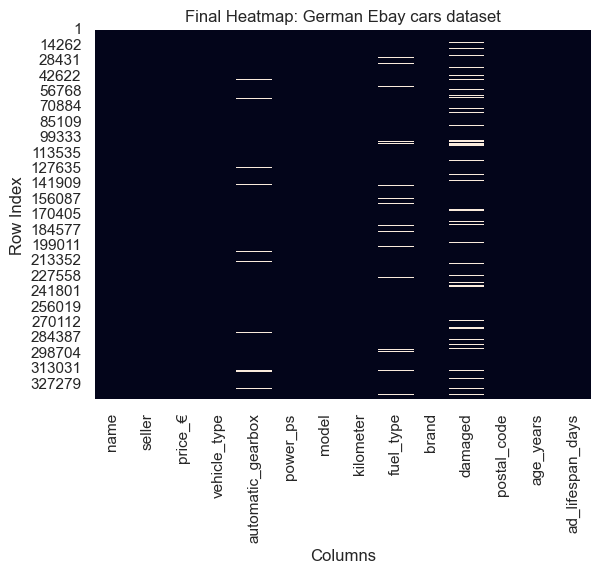

In [62]:
sns.heatmap(ebay_final.isnull(), cbar=False)
plt.title('Final Heatmap: German Ebay cars dataset')
plt.ylabel('Row Index')
plt.xlabel('Columns')

So, from the starting 371.528 ads, we are down to 238.374 entries in our final dataset; with 30.000 missing values in the 'damaged' column, 10.000 missing values for fuel type, and 7.000 for automatic gearbox.

## 7. Data Visualization and Analysis<a name="section7"></a>

Let's approach our analysis according to our goals:

* (0) General correlations between variables: 
* (1) What are the most popular combinations of models, brands, and vehicle types?
* (2) How do car models compare in general?
* (3) How do car brands compare in general?
* (4) How does car damage status compare in general?
* (5) How do fuel types compare in general?
* (6) How do automatic cars compare to manual ones in general?
* (7) How do vehicle types compare in general?

<Axes: >

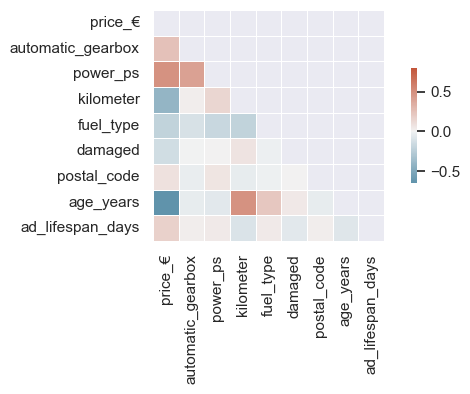

In [63]:
#(0) General correlation between variables
ebay_corr=ebay_final.corr(numeric_only=True, method='spearman')
mask_corr= np.triu(np.ones_like(ebay_corr, dtype=bool))
f, ax = plt.subplots(figsize=(7,3))
cmap_corr = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(ebay_corr, mask=mask_corr, cmap=cmap_corr, vmax=.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

Noteworthy are just the strong correlations between price and: 'age_years', 'automatic_gearbox', 'power_ps'; and between 'age_years' and 'kilometer'.

One would think that price and fuel type cleanliness would be invertly proportional: the more technology that is required to move away from traditional fuel, the more the car would cost. However, here we see a very weak correlation.

In [64]:
ebay_final['model'].value_counts()*100/len(ebay_final)

golf               8.573218
3er                6.956989
a4                 3.584513
passat             3.311190
5er                3.150149
                     ...   
kalina             0.000895
lanos              0.000447
elefantino         0.000447
serie_1            0.000447
discovery_sport    0.000447
Name: model, Length: 257, dtype: float64

Text(0.5, 1.0, 'Market Share by Vehicle Type in German Ebay ads')

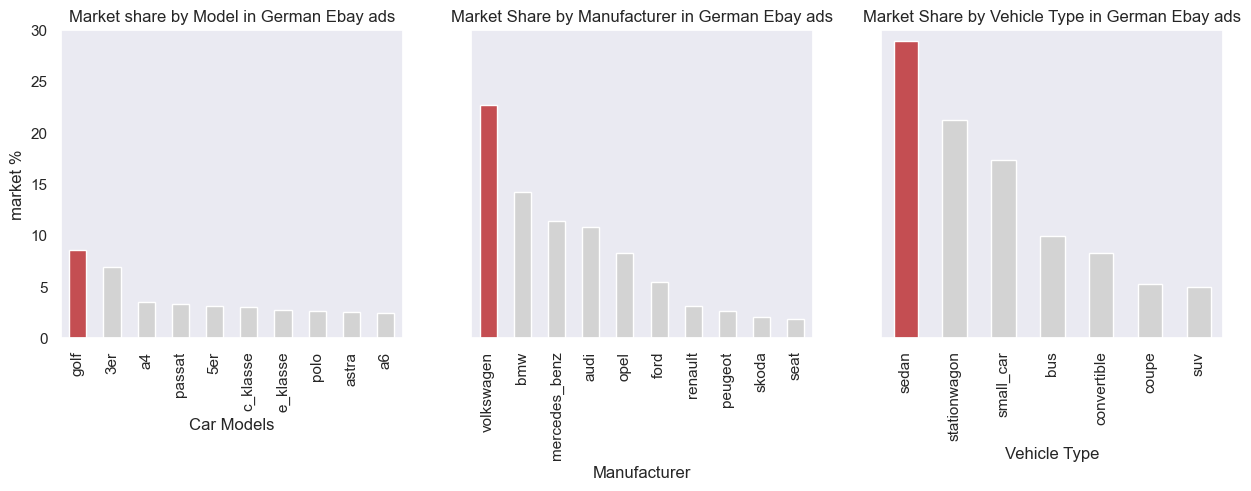

In [65]:
# (1) Find the most common brand/model/vehicle type combinations
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,3,1)
(ebay_final['model'].value_counts(ascending=False)*100/len(ebay_final)).head(10).plot(kind='bar', color=['r', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray'])
plt.ylabel('market %')
plt.ylim([0,30])
plt.xlabel('Car Models')
plt.title('Market share by Model in German Ebay ads')
ax2=plt.subplot(1,3,2, sharey = ax1)
(ebay_final['brand'].value_counts(ascending=False)*100/len(ebay_final)).head(10).plot(kind='bar',color=['r', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray'])

plt.xlabel('Manufacturer')
plt.title('Market Share by Manufacturer in German Ebay ads')
ax3 = plt.subplot(1,3,3, sharey=ax1)
(ebay_final['vehicle_type'].value_counts(ascending=False)*100/len(ebay_final)).head(7).plot(kind='bar',color=['r', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray'])

plt.xlabel('Vehicle Type')
plt.title('Market Share by Vehicle Type in German Ebay ads')

The most popular brands are all german: Volkswagen(23%), bmw(15%), Mercedes(12%), Audi(11%), Opel(10%)
The most popular cars models are also german: golf(8%), 3er(7%), a4, 5er and passat (3%);
The most common vehicle types are: sedans(28%), stationwagons(20%), and small cars(17%).

In [66]:
#(2) Which models sell the fastest? And the slowest?
pivot_model = ebay_final.pivot_table(values=['ad_lifespan_days', 'price_€', 'age_years', 'kilometer'],
            index='model', 
            aggfunc={'ad_lifespan_days':np.median, 'price_€':np.median, 'age_years':np.median,
            'kilometer':np.median }).sort_values(
                by='ad_lifespan_days', ascending=False)

model_counter = pd.DataFrame({'model': ebay_final['model'].value_counts().index,
                              'market_%':ebay_final['model'].value_counts().values*100/len(ebay_final)})

pivot_model_f1 = pivot_model.merge(model_counter, how='left', on='model')

def counter_conversor(row):
    if row['market_%']>.4:
        row['market_%']=.4
    return row

def kilometer_conversor(row):
    if row['kilometer']>120000:
        row['kilometer']='high_km'
    elif row['kilometer']>80000:
        row['kilometer']='avg_km'
    else:
        row['kilometer']='low_km'
    return row

def year_conversor(row):
    if row['age_years']>20:
        row['age_years']=20
    return row

pivot_model_f2= pivot_model_f1.apply(counter_conversor, axis=1)
pivot_model_f3=pivot_model_f2.apply(kilometer_conversor, axis=1)
pivot_model_f4 = pivot_model_f3.apply(year_conversor, axis=1).set_index('model')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(pivot_model)


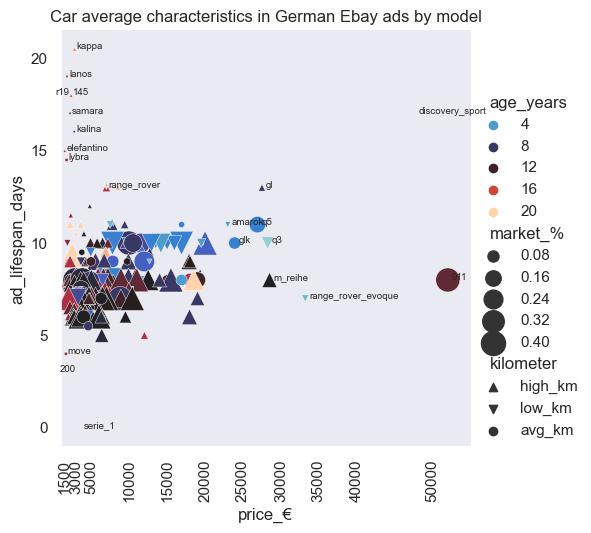

In [67]:
p1 = sns.relplot(data=pivot_model_f4, x='price_€', y='ad_lifespan_days', size='market_%',
                 sizes=(5,300), hue='age_years', palette='icefire', style='kilometer', markers=['^', 'v','o'] )
ax = p1.axes[0,0]
ax.set_xticks([1500,3000,5000,10000,15000,20000,25000,30000,35000,40000,50000])
# text=list(pivot_model.index)[0]
#ax.text(pivot_model.iloc[0,4]+2000, pivot_model.iloc[0,0], text, horizontalalignment='left', size='xx-small')

expensive_model = pivot_model_f4[pivot_model_f4['price_€']>20000]#.reset_index().drop(['index'], axis=1)

for i in range(1, len(expensive_model)):
#     if i ==1:
#         continue
    x=expensive_model.iloc[i,3]
    y=expensive_model.iloc[i,0]
    text = list(expensive_model.index)[i]
#     ax.text(x+500, y, text, horizontalalignment='left', size='xx-small')
#     print(text)
#     print(x)
#     if i==0:
#         continue
#     else:
    ax.text(x+500, y, text, horizontalalignment='left', size='xx-small')
#     print('---')


for j in range(0,10): #greater ad lifespan
    x=pivot_model_f4.iloc[j,3]
    y=pivot_model_f4.iloc[j,0]
    text = list(pivot_model_f4.index)[j]
    if j ==2:
        ax.text(x-250, y-.5*j, text, horizontalalignment='right', size='xx-small')
    else:
        ax.text(x+250, y, text, horizontalalignment='left', size='xx-small')

for m in range(1,4): #shorter ad lifespan
    x=pivot_model_f4.iloc[-m,3]
    y=pivot_model_f4.iloc[-m,0]
    text = list(pivot_model_f4.index)[-m]
#     ax.text(x+500, y, text, horizontalalignment='left', size='xx-small')
    if m ==2:
        ax.text(x-250, y-.5*m, text, horizontalalignment='right', size='xx-small')
    else:
        ax.text(x+250, y, text, horizontalalignment='left', size='xx-small')
    
plt.xticks(rotation=90)
plt.title("Car average characteristics in German Ebay ads by model")
plt.xlim([1000,55000])
plt.show()

The outlying worst cars to re-sell are generally older(>12 years), medium to high mileage, and not so common(<0.1%),despite being cheap (< €10k)- exception made to the discovery sport at over €45k. The worst cluster to sell are newer(4-12 years), low mileage, more expensive ones (> €10k), and also widely produced(0.2-0.5%).

At the very bottom of the chart we have some very cheap(< €5k), niche(<0.1%), old(16-20 years), medium mileage cars. The commonly easiest cars to sell (lower cluster) are abundant, cheap(< €12.5k), high mileage averaging 12 years of age.

In [68]:
#(3) What brands sell the fastest? And the slowest?
pivot_brand = ebay_final.pivot_table(values=['ad_lifespan_days', 'price_€', 'age_years', 'kilometer'],
            index='brand', 
            aggfunc={'ad_lifespan_days':np.median, 'price_€':np.median, 'age_years':np.median,
            'kilometer':np.median}).sort_values(
                by='ad_lifespan_days', ascending=False)

brand_counter = pd.DataFrame({'brand': ebay_final['brand'].value_counts().index,
                              'market_%':ebay_final['brand'].value_counts().values*100/len(ebay_final)})

pivot_brand = pivot_brand.merge(brand_counter, how='left', on='brand')


def brand_counter_conversor(row):
    if row['market_%']>2.7:
        row['market_%']=2.7
    return row

pivot_brand_f1= pivot_brand.apply(brand_counter_conversor, axis=1)
pivot_brand_f2=pivot_brand_f1.apply(kilometer_conversor, axis=1)
pivot_brand_f3=pivot_brand_f2.apply(year_conversor, axis=1).set_index('brand')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(pivot_brand)


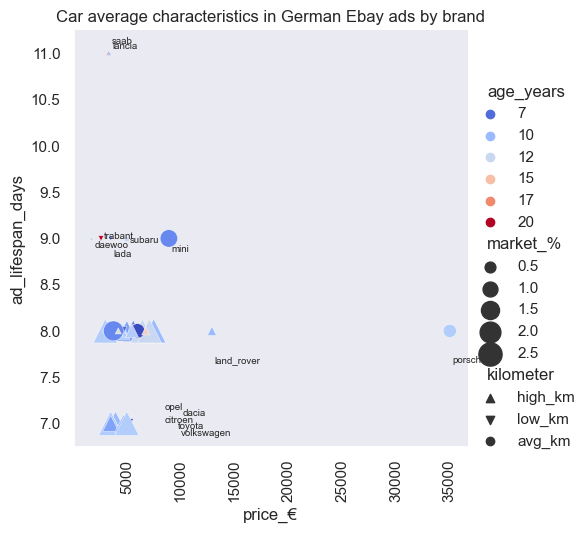

In [69]:
#(3) What brands sell the fastest? And the slowest?
p2 = sns.relplot(data=pivot_brand_f3, x='price_€', y='ad_lifespan_days', size='market_%',
                 sizes=(10,300), hue='age_years', palette="coolwarm", style='kilometer', markers=['^', 'v', 'o'] )
ax2 = p2.axes[0,0]

expensive_brand = pivot_brand_f3[pivot_brand_f3['price_€']>10000]

for i in range(len(expensive_brand)):
        x=expensive_brand.iloc[i,3]
        y=expensive_brand.iloc[i,0]
        text = list(expensive_brand.index)[i]  
        ax2.text(x+250, y, text, horizontalalignment='left', size='xx-small')
        
for j in range(0,7):
    x=pivot_brand_f3.iloc[j,3]
    y=pivot_brand_f3.iloc[j,0]
    text = list(pivot_brand_f3.index)[j]
    ax2.text(x+250, y+.1 - .05*j, text, horizontalalignment='left', size='xx-small')
#     if j %2==0:
#         ax2.text(x-50*j, (y+.1)-.05*j, text, horizontalalignment='right', size='xx-small')
#     else:
#         ax2.text(x+50*j, (y+.1)+.05*j, text, horizontalalignment='left', size='xx-small')

for m in range(1,6):
    x=pivot_brand_f3.iloc[-m,3]
    y=pivot_brand_f3.iloc[-m,0]
    text = list(pivot_brand_f3.index)[-m]
    ax2.text(x+5000, (y-.2)+.07*m, text, horizontalalignment='left', size='xx-small')
    
plt.xticks(rotation=90)
plt.ylim([6.75,11.25])
plt.title("Car average characteristics in German Ebay ads by brand")
plt.show() 

Lancia, Saab land at the top of the slowest brands to re-sell with 11 days. They are usually very old(>12 years), high mileage, niche brands (<0.5%). 

The easiest brands to re-sell are volkswagen, toyota, opel, dacia, citroen, peugeot (7 days). These present more uniform traits: low price below €5k, high mileage, massive production, averaging 10-12 years of age.

In [70]:
#(4) How does car damage interfer generally?
pivot_damaged = ebay_final.pivot_table(values=['ad_lifespan_days', 'price_€', 'age_years', 'kilometer'],
            index='damaged', 
            aggfunc={'ad_lifespan_days':np.median, 'price_€':np.median, 'age_years':np.median,
            'kilometer':np.median}).sort_values(
                by='ad_lifespan_days', ascending=False)

damaged_counter = pd.DataFrame({'damaged': ebay_final['damaged'].value_counts().index,
                              'market_%':(ebay_final['damaged'].value_counts().values*100/len(ebay_final)).round(2)})

pivot_damaged_f1 = pivot_damaged.merge(damaged_counter, how='left', on='damaged').set_index('damaged')

In [71]:
#(4) How does car damage interfer generally?
pivot_damaged_f1

,ad_lifespan_days,age_years,kilometer,price_€,market_%
damaged,,,,,
0.0,8,10,150000,5700,82.17
1.0,5,11,150000,3200,5.13


Damaged cars cost 56% as much and amount to roughly 6.25% of the total undamaged cars. Interestingly, those get sold much quicker (at 62% of the timespan) than the undamaged, despite car age and mileage being technically the same. This is probably due to a heated car parts market.

In [72]:
# (5) How do different fuels compare generally?
pivot_fuel = ebay_final.pivot_table(values=['ad_lifespan_days', 'price_€', 'age_years', 'kilometer'],
            index='fuel_type', 
            aggfunc={'ad_lifespan_days':np.median, 'price_€':np.median, 'age_years':np.median,
            'kilometer':np.median}).sort_index()

fuel_counter = pd.DataFrame({'fuel_type': ebay_final['fuel_type'].value_counts().index,
                              'market_%':(ebay_final['fuel_type'].value_counts().values*100/len(ebay_final)).round(2)})

pivot_fuel_f1 = pivot_fuel.merge(fuel_counter, how='left', on='fuel_type')
pivot_fuel_f2=pivot_fuel_f1.apply(kilometer_conversor, axis=1).set_index('fuel_type')

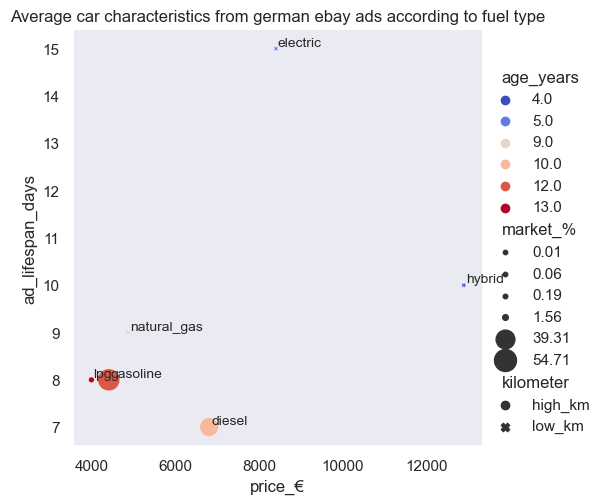

In [73]:
# (5) How do different fuels compare generally?
#plt.figure(figsize=(7,3))
p4 = sns.relplot(data=pivot_fuel_f2, x='price_€', y='ad_lifespan_days' , size='market_%',
                 sizes=(10,250), hue='age_years', palette="coolwarm", style='kilometer' )
ax4 = p4.axes[0,0]

for i in range(len(pivot_fuel_f2)):
    #if i==1:
       # continue
    x=pivot_fuel_f2.iloc[i,3]
    y=pivot_fuel_f2.iloc[i,0]
    if i==0:
        text='diesel'
    elif i==1:
        text='gasoline'
    elif i==2: 
        text='lpg'
    elif i==3:
        text='natural_gas'
    elif i==4:
        text='hybrid'
    else:
        text='electric'
    
    ax4.text(x+50, y+.05, text, horizontalalignment='left', size='small')
    #ax4.set_xticklabels(['diesel', 'gasoline', 'lpg', 'natural_gas', 'hybrid', 'electric'])
#plt.xlabel('Fuel Type Code')
plt.title('Average car characteristics from german ebay ads according to fuel type')
plt.show()

The traditional fossil fuels, gasoline and diesel, range from €4k-€6.5k, average 11 years of age, sell easily (8 days max), are widely available(90% of the market, combined), are high mileage. In contrast, more recent technology (2011) away from fossil (electric, hybrid) are way less popular(0.15%) and unused, and while hybrid is more expensive (13k), electric has the worst liquidity (15 days).

As we translated the fuel types in the dataset into a gradual order of technology away from petro, we expected to see a direct relation between technology onboard and price, but that is not what we observe. Very likely, the market is distorted because there are government incentives for electric cars, but not as much to hybrid ones. Proof of that would be that electric cars are more rare and harder to sell: costumers are not fully onboard with the current offer for that technology.

In [74]:
# (6) How do gearboxes compare generally?
pivot_gearbox = ebay_final.pivot_table(values=['ad_lifespan_days', 'price_€', 'age_years', 'kilometer'],
            index='automatic_gearbox', 
            aggfunc={'ad_lifespan_days':np.median, 'price_€':np.median, 'age_years':np.median,
            'kilometer':np.median}).sort_index()

gearbox_counter = pd.DataFrame({'automatic_gearbox': ebay_final['automatic_gearbox'].value_counts().index,
                              'market_%':(ebay_final['automatic_gearbox'].value_counts().values*100/len(ebay_final)).round(1)})

pivot_gearbox_f1 = pivot_gearbox.merge(gearbox_counter, how='left', on='automatic_gearbox')

pivot_gearbox_f2=pivot_gearbox_f1.apply(kilometer_conversor, axis=1).drop(['automatic_gearbox'], axis=1)


In [75]:
pivot_gearbox_f2

,ad_lifespan_days,age_years,kilometer,price_€,market_%
0,7.0,11.0,high_km,4500.0,69.8
1,8.0,10.0,high_km,7989.5,27.2


Manual cars cost 56% as much as automatic ones, despite averaging nearly the same registration year and high mileage. Manual cars respond for roughly 70% of the market, whereas automatics are 27.2%. This proves once again how europeans are inclined to clutch and stick

In [76]:
# (7) How do different vehicle types compare generally?
pivot_vehicle = ebay_final.pivot_table(values=['ad_lifespan_days', 'price_€', 'age_years', 'kilometer'],
            index='vehicle_type', 
            aggfunc={'ad_lifespan_days':np.median, 'price_€':np.median, 'age_years':np.median,
            'kilometer':np.median})

vehicle_counter = pd.DataFrame({'vehicle_type': ebay_final['vehicle_type'].value_counts().index,
                              'market_%':(ebay_final['vehicle_type'].value_counts().values*100/len(ebay_final)).round(1)})

pivot_vehicle_f1 = pivot_vehicle.merge(vehicle_counter, how='left', on='vehicle_type')

pivot_vehicle_f2=pivot_vehicle_f1.apply(kilometer_conversor, axis=1).set_index('vehicle_type')


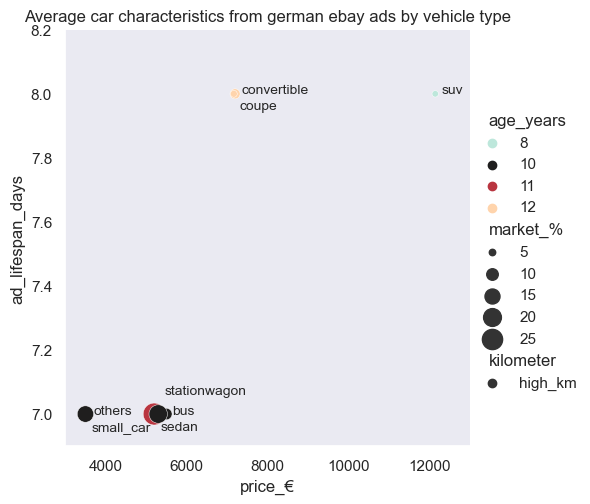

In [77]:
# (7) How do different vehicle types compare generally?
#plt.figure(figsize=(7,3))
p6 = sns.relplot(data=pivot_vehicle_f2, x='price_€', y='ad_lifespan_days' , size='market_%',
                 sizes=(10,250), hue='age_years', palette="icefire", style='kilometer' )
ax6 = p6.axes[0,0]

for i in range(len(pivot_vehicle_f2)):
    #if i==1:
       # continue
    x=pivot_vehicle_f2.iloc[i,3]
    y=pivot_vehicle_f2.iloc[i,0]
    text=list(pivot_vehicle_f2.index)[i]
    
    if (i==2)|(i==4)|(i==5):
        ax6.text(x+150, y-.05, text, horizontalalignment='left', size='small')
    elif i==6:
        ax6.text(x+150, y+.06, text, horizontalalignment='left', size='small')
    else:
        ax6.text(x+150, y, text, horizontalalignment='left', size='small')

plt.title('Average car characteristics from german ebay ads by vehicle type')
plt.ylim([6.9,8.2])
plt.xlim([3000,13000])
plt.show()

The most expensive cars are the latest SUV's (€12k), which are quickly becoming popular, followed by sportscars around €7k (coupe, convertibles). Buses, station wagons (overlapping) and sedans are worth around € 5500. Small cars and 'others' hit €3.5k. 

One can see the market tendencies in this chart: we switched from sedans(for families), coupes and convertibles to bus and statioswagon (families) and small cars. The latest trend is SUV's more generally.

## 8. Conclusion<a name="section8"></a>

In this project, we strived to profile used cars from German Ebay ads section, analyzing the data's main variables, namely 'price_€', 'ad_lifespan_days', 'kilometer', 'year_of_registration', and their amounts according to model, brand, fuel_type, damage status and gearbox.

We arrived at the following:
* (1) What are the most popular combinations of models, brands, and vehicle types?
     - brands(by market share): Volkswagen(23%), bmw(15%), Mercedes(12%), Audi(11%), Opel(10%);
     
     - models(by market share): golf(8%), 3er(7%), a4, 5er and c_klasse (3%);
     
     - vehicle types(by market share): sedans(30%), stationwagons(20%), and small cars(17%).
     
* (2) How do car models compare in general?
* (2).1 The exceptionally worst cars to re-sell: older(>12 years), high mileage(>120kkm), rare(<0.08%), cheap(<€10k); 

     - Generally: newer(4 years), not high mileage, fairly abundant(>=0.25%), expensive (€7.5k-€20k);
     
* (2).2 The exceptionally best to re-sell: older(16-20 years), average mileage, niche cars(<0.08%), very cheap(<€5k); 

    - More generally: older(8-12 years), high mileage, fairly abundant(>=0.16%), cheap(<€10k).
    
* (3) How do car brands compare in general?

    - The best selling brands: older(8-10 years), high mileage, fairly abundant(>=1%), cheaper(€5k); 

* (4) How does car damage status compare in general?

    - Damaged cars are 43% cheaper and amount to roughly 6.25% of total undamaged cars, and sell 38% faster than the time for undamaged.

* (5) How do fuel types compare in general?

    - Traditional fossil fuels: aged (11 years), high mileage, abundant(97%), very cheap(€5k-€7.7k).

    - Electrified cars: younger (5 years), less used, less popular(0.15%); hybrid expensive (€13k), electric least liquidity (13 days vs normal 8 days to sell).
    
* (6) How do automatic cars compare to manual ones in general?

    - Automatic cars €8k, manual €4.5k, but technically same age, mileage and liquidity. Automatic = 70% of the market vs 27.2%

* (7) How do vehicle types compare in general?

    - All types with similar liquidity (7-8 days) and high mileage: SUV (€13k, 5%, 8yo), coupe (€7.8k, 5%, 12yo), convertible (€7.8k, 10%, 12yo), sedan(€5.5k,30%,11yo), stationwagon (€5.6k, 20%,10yo), others/small_car (€3.7k,15%,10yo)

    - Epoch trends: 1st "sedans, coupes and convertibles" to "bus, statioswagons and small cars", and now SUV's .


This dataset is very thorough, and in order to finish this project some simplifications were made. There is plenty of room to improve, and we can rank the further developments as follows:

* Improve function to extract the car model from the ad name, namely when the model name is not in the brand dictionary (expand brand dictionary with complete online catalogs);
* create a row with engine_size from 'name'/most common type;
* Use a translation api for german words instead of a manually self-made dictionary (googleTranslator only 5k words allowed);
* Study the german postal code and be able to categorize the ads by city/region;
* check in name if car is 4x4, create new row for this variable.